In [3]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.constants import G_0_muS, G_0_S

from theory.models.hamiltonian_approach import get_I_nA as get_I_nA_HA

from theory.models.btk import get_I_nA as get_I_nA_btk

from tqdm import tqdm

from scipy.signal import savgol_filter

In [4]:
# Set plot fontsizes
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
textwidth = 4.25279  # in

print(
    " 1.0*textwidth",
    textwidth,
    "\n",
    "0.9*textwidth",
    0.9 * textwidth,
    "\n",
    "0.8*textwidth",
    0.8 * textwidth,
    "\n",
    "0.7*textwidth",
    0.7 * textwidth,
    "\n",
    "0.6*textwidth",
    0.7 * textwidth,
    "\n",
    "0.5*textwidth",
    0.5 * textwidth,
    "\n",
    "0.4*textwidth",
    0.4 * textwidth,
    "\n",
)

 1.0*textwidth 4.25279 
 0.9*textwidth 3.8275110000000003 
 0.8*textwidth 3.402232 
 0.7*textwidth 2.976953 
 0.6*textwidth 2.976953 
 0.5*textwidth 2.126395 
 0.4*textwidth 1.701116 



# MAR (Cueavas)

In [21]:
# load and thread data

data = np.load("carlosHA.npz")
tau = data["tau"][1:]
eV_Delta = data["eV_Delta"]
eI_DeltaG_0 = data["eI_DeltaG_0"][1:, :]

tau = np.concatenate((tau[:2], tau[3:]))

eI_DeltaG_0 = np.concatenate((eI_DeltaG_0[:2, :], eI_DeltaG_0[3:, :]))

eV_Delta_max = 2.85
index = np.argmin(np.abs(eV_Delta - eV_Delta_max))
eV_Delta = eV_Delta[:index]
eI_DeltaG_0 = eI_DeltaG_0[:, :index]

dIdV_G_0 = np.gradient(eI_DeltaG_0, eV_Delta, axis=1)
dIdV_G_0[:, 0] = 0.0
dIdV_G_0[-1, 0] = np.inf
dIdV_G_0 = np.concatenate((dIdV_G_0[:, :159], dIdV_G_0[:, 161:]), axis=1)
eV_Delta2 = np.concatenate((eV_Delta[:159], eV_Delta[161:]))
deV_Delta = float((np.max(eV_Delta) - np.min(eV_Delta)) / (len(eV_Delta) - 1))

In [22]:
# # or generate data
# Delta_meV = 0.180  # meV
# Gamma_meV = 1e-9  # meV
# T_K = 0.001  # K
# tau = np.concatenate(
#     (
#         np.array([0.001]),
#         np.linspace(0.01, 0.04, 4),
#         np.linspace(0.05, 0.925, 36),
#         np.linspace(0.95, 0.99, 5),
#         np.array([0.995, 0.998, 1.0]),
#     )
# )
# # tau = np.concatenate(
# #     (
# #         np.array([0.001]),
# #         np.linspace(0.01, 0.04, 4),
# #         np.linspace(0.05, 0.9, 18),
# #         np.linspace(0.95, 0.99, 5),
# #         np.array([0.995, 1.0]),
# #     )
# # )
# # deV_Delta = .01
# eV_Delta = np.arange(0, 10 + deV_Delta, deV_Delta)

# eI_DeltaG_0 = np.full((tau.shape[0], eV_Delta.shape[0]), np.nan)

# for i, tau_i in enumerate(tqdm(tau)):
#     eI_DeltaG_0_temp = (
#         get_I_nA_HA(
#             V_mV=eV_Delta * Delta_meV,
#             tau=tau_i,
#             T_K=T_K,
#             Delta_meV=np.array([Delta_meV, Delta_meV]),
#             Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
#         )
#         / G_0_muS
#         / Delta_meV
#     )
#     eI_DeltaG_0_temp = savgol_filter(eI_DeltaG_0_temp, 10, 1)
#     eI_DeltaG_0[i, :] = eI_DeltaG_0_temp

# eV_Delta_max = 2.85
# index = np.argmin(np.abs(eV_Delta - eV_Delta_max))
# eV_Delta = eV_Delta[:index]
# eI_DeltaG_0 = eI_DeltaG_0[:, :index]


# eI_DeltaG_0[:, 0] = 0.0
# eI_DeltaG_0[-1, 0] = 2.0
# dIdV_G_0 = np.gradient(eI_DeltaG_0, eV_Delta, axis=1)
# eV_Delta2 = eV_Delta
# dIdV_G_0[:, 0] = 0.0
# dIdV_G_0[-1, 0] = np.inf

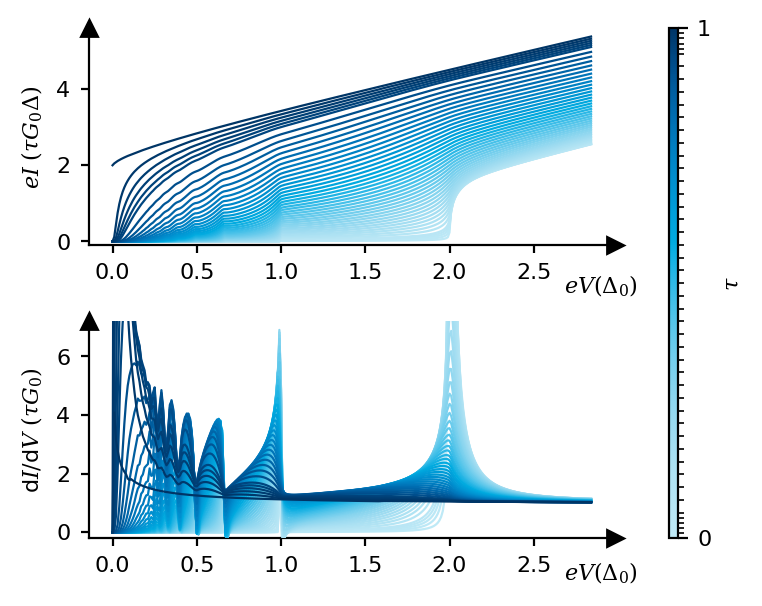

In [23]:
%matplotlib inline

fig, axs = plt.subplots(figsize=(3.8,3), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.1], "hspace": 0.35})
fig.subplots_adjust(top=0.95, bottom=0.1)  # oder was immer gut aussieht
# alternativ: fig.tight_layout(rect=[0, 0, 1, 0.98])


gs = axs[0,1].get_gridspec()
ax_IV = axs[0,0]
ax_dIdV = axs[1,0]

t, _ = np.meshgrid(tau, np.ones_like(tau))
tau_map = cmap(clim=[.1, .8], inverse=True)
im = axs[0,1].imshow(t, cmap = tau_map, clim=(0, 1))

axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])
cbar=fig.colorbar(im, label=r'$\tau$', cax=ax_clb)
ax_clb.set_yticks(tau, minor=True)
ax_clb.set_yticks([0,1])

lw=.8
for i, tau_i in enumerate(tau):
#     if i%2==1:
    ax_IV.plot(eV_Delta, eI_DeltaG_0[i,:]/tau_i, '-',label=f'{tau_i:0.03}', zorder=i, color=tau_map(tau_i), lw=lw)
    ax_dIdV.plot(eV_Delta2, dIdV_G_0[i,:]/tau_i, '-',label=f'{tau_i:0.03}', zorder=i, color=tau_map(tau_i), lw=lw)

ax_dIdV.set_ylim(-0.2,7.2)
ax_IV.set_ylim(-0.1, 5.6)

color='k'
for ax in [ax_IV, ax_dIdV]:

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    # ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

ax_IV.text(x_lim[1]-.3, -1.175, "$eV (\\Delta_0)$", ha="left", va="center", fontsize=8)
ax_dIdV.text(x_lim[1]-.3, -1.4, "$eV (\\Delta_0)$", ha="left", va="center", fontsize=8)
ax_IV.set_ylabel('$eI\\ (\\tau G_0\\Delta)$')
ax_dIdV.set_ylabel('d$I/$d$V\\ (\\tau G_0)$')

fig.savefig("mar-iv.pgf")
fig.savefig("mar-iv.pdf")

# AR (BTK)

In [29]:
# generate Data
Delta_meV = 0.180  # meV
Gamma_meV = 1e-9  # meV
T_K = 0.0  # K
tau = np.concatenate(
    (
        np.array([0.001]),
        np.linspace(0.01, 0.04, 4),
        np.linspace(0.05, 0.925, 36),
        np.linspace(0.95, 0.99, 5),
        np.array([0.995, 0.998, 1.0]),
    )
)
eV_Delta = np.arange(0, 10 + deV_Delta, deV_Delta)

eI_DeltaG_0 = np.full((tau.shape[0], eV_Delta.shape[0]), np.nan)
for i, tau_i in enumerate(tqdm(tau)):
    eI_DeltaG_0[i, :] = (
        get_I_nA_btk(
            V_mV=eV_Delta * Delta_meV,
            Delta_meV=Delta_meV,
            tau=tau_i,
            T_K=T_K,
            Gamma_meV=Gamma_meV,
        )[0, :]
        / G_0_muS
        / Delta_meV
    )

eV_Delta_max = 2.85 / 2
index = np.argmin(np.abs(eV_Delta - eV_Delta_max))
eV_Delta = eV_Delta[:index]
eV_Delta2 = eV_Delta
eI_DeltaG_0 = eI_DeltaG_0[:, :index]

dIdV_G_0 = np.gradient(eI_DeltaG_0, eV_Delta, axis=1)

100%|██████████| 49/49 [00:08<00:00,  5.62it/s]


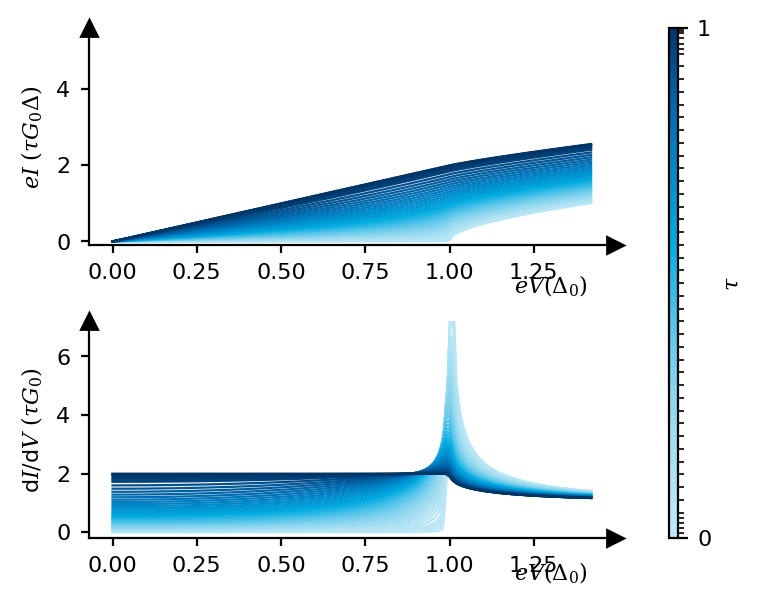

In [30]:
%matplotlib inline

fig, axs = plt.subplots(figsize=(3.8,3), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.1], "hspace": 0.35})
fig.subplots_adjust(top=0.95, bottom=0.1)  # oder was immer gut aussieht
# alternativ: fig.tight_layout(rect=[0, 0, 1, 0.98])


gs = axs[0,1].get_gridspec()
ax_IV = axs[0,0]
ax_dIdV = axs[1,0]

t, _ = np.meshgrid(tau, np.ones_like(tau))
tau_map = cmap(clim=[.1, .8], inverse=True)
im = axs[0,1].imshow(t, cmap = tau_map, clim=(0, 1))

axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])
cbar=fig.colorbar(im, label=r'$\tau$', cax=ax_clb)
ax_clb.set_yticks(tau, minor=True)
ax_clb.set_yticks([0,1])

lw=.8
for i, tau_i in enumerate(tau):
#     if i%2==1:
    ax_IV.plot(eV_Delta, eI_DeltaG_0[i,:]/tau_i, '-',label=f'{tau_i:0.03}', zorder=i, color=tau_map(tau_i), lw=lw)
    ax_dIdV.plot(eV_Delta2, dIdV_G_0[i,:]/tau_i, '-',label=f'{tau_i:0.03}', zorder=i, color=tau_map(tau_i), lw=lw)

ax_dIdV.set_ylim(-0.2,7.2)
ax_IV.set_ylim(-0.1, 5.6)

color='k'
for ax in [ax_IV, ax_dIdV]:

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    # ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

ax_IV.text(x_lim[1]-.3, -1.175, "$eV (\\Delta_0)$", ha="left", va="center", fontsize=8)
ax_dIdV.text(x_lim[1]-.3, -1.4, "$eV (\\Delta_0)$", ha="left", va="center", fontsize=8)
ax_IV.set_ylabel('$eI\\ (\\tau G_0\\Delta)$')
ax_dIdV.set_ylabel('d$I/$d$V\\ (\\tau G_0)$')

fig.savefig("ar-iv.pgf")
fig.savefig("ar-iv.pdf")